### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

sns.set(rc={"figure.figsize":(9,4)})

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [98]:
df = pd.read_csv('data/coupons.csv')

In [99]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Data frame information

> Answers:

- There are many categorical features

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

> Answers:

There are missing data in 6 different features

|Column Name|Missing|missing ratio|
|--|--|--|
|car|                     12576|99.1%|
|Bar|                       107|00.8%|
|CoffeeHouse|               217|01.7%|
|CarryAway|                 151|01.2%|
|RestaurantLessThan20|      130|01.0%|
|Restaurant20To50|          189|01.4%|



In [101]:
# Getting the number of missing data
(df.isnull().sum()/(df.isnull().sum()+df.count()))[df.isnull().sum()/(df.isnull().sum()+df.count()) > 0.0]

car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

> Answers:

- Since the column 'car' is missing 99.1% of data, there is no point of having the column. The 'car' will be dropped. 

- After drop the column 'car', drop rows that has missing data from the all columns.

In [102]:
df = df.drop("car", axis=1)
df = df.dropna()
df.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon? 

> Answers:

56.9% of observations answered as 'Yes' and the rest 43.1% of them answered as 'No'

<AxesSubplot: title={'center': 'Coupon acceptance ratio'}>

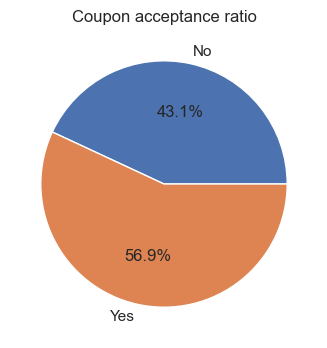

In [103]:
YRatio = df.groupby("Y").size().plot.pie(autopct="%1.1f%%", title="Coupon acceptance ratio", labels=["No", "Yes"])
YRatio

5. Use a bar plot to visualize the `coupon` column.

> Answers:

The most distributed coupon is 'Coffee House' and the least coupon is 'Restaurant(20-50)' coupon.

If there are data that associated with marketing fund, we can calculate rough ROI(Return of Investment) of the campaign. 

<AxesSubplot: title={'center': 'Number of coupons by types'}, xlabel='coupon'>

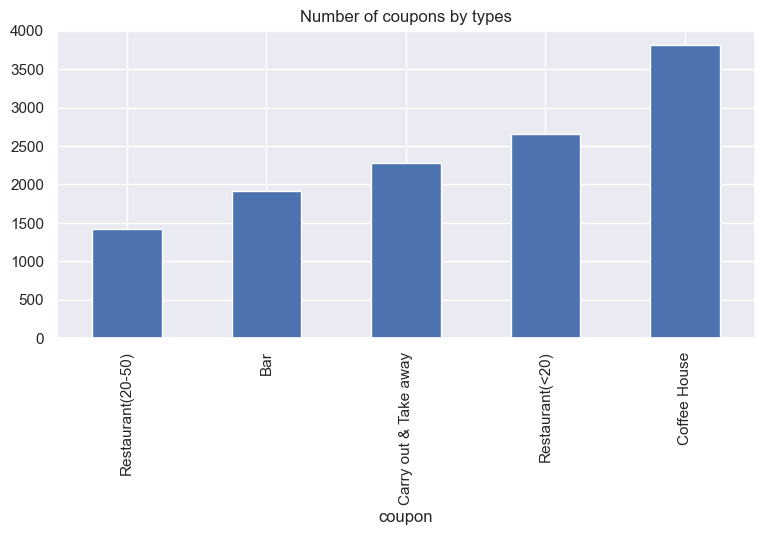

In [104]:
histPoupon = df.groupby("coupon").size().sort_values(ascending=True).plot.bar(title="Number of coupons by types")
histPoupon

In [131]:
piePoupon = px.pie(
    data_frame=df.groupby(["coupon"]).size().sort_values(ascending=False).reset_index().rename(columns={0:"counts"}),
    values="counts",
    names="coupon",
    title="Distributed coupons types",
    width=800, height=400
)
piePoupon.show()

Based on the type of coupon offering whos diffent acceptance ratio.

For example, Carry out & Take away and Restaurant(<20) shows more half of drivers accepted the coupons, but Restaurant(20-50) and Bar shows less than 30% of acceptance ratio.

We might need to consider who is more likey to accept each offering.

In [106]:
df.groupby(["coupon", "Y"]).size()

coupon                 Y
Bar                    0    1125
                       1     788
Carry out & Take away  0     598
                       1    1682
Coffee House           0    1922
                       1    1894
Restaurant(20-50)      0     785
                       1     632
Restaurant(<20)        0     772
                       1    1881
dtype: int64

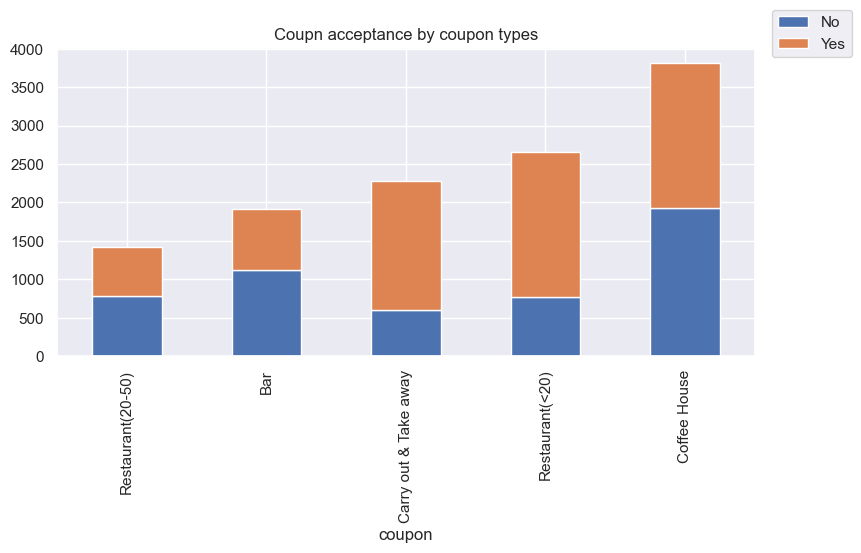

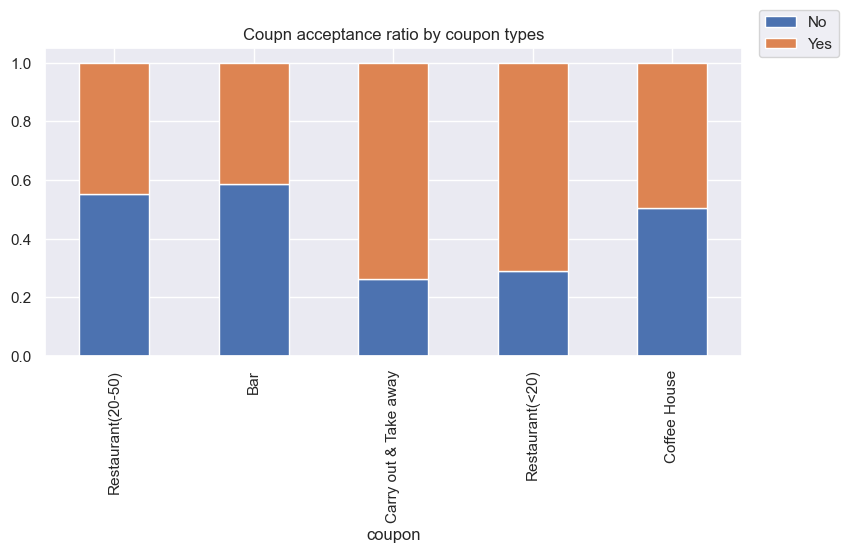

In [144]:
axCouponCounts = df.groupby(["coupon", "Y"]).size().unstack().loc[["Restaurant(20-50)", "Bar", "Carry out & Take away", "Restaurant(<20)", "Coffee House"]].\
    plot.bar(
        stacked=True, 
        title="Coupn acceptance by coupon types"
    )
axCouponCounts.legend(["No", "Yes"], loc=1, bbox_to_anchor=(0.6,0.6,0.55,0.55))
axCouponRatio = (df.groupby(["coupon", "Y"]).size()/df.groupby(["coupon"]).size()).unstack().loc[["Restaurant(20-50)", "Bar", "Carry out & Take away", "Restaurant(<20)", "Coffee House"]].\
    plot.bar(
        stacked=True, 
        title="Coupn acceptance ratio by coupon types"
    )
axCouponRatio.legend(["No", "Yes"], loc=1, bbox_to_anchor=(0.6,0.6,0.55,0.55))

6. Use a histogram to visualize the temperature column.

> Note:

The temperataure is cpatured as categorigal feature. We need to conver this as categorical for machine learning project.

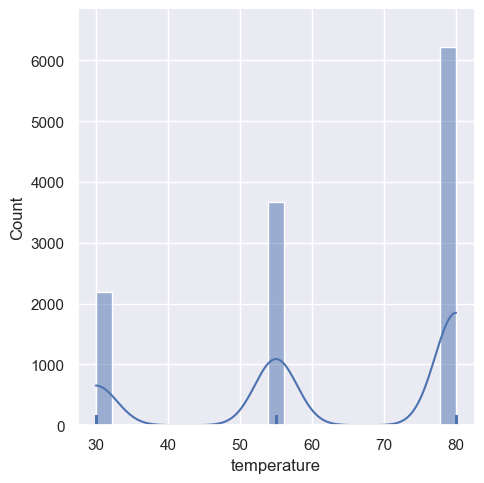

In [108]:
axTempperatureHistogram = sns.displot(data=df, x="temperature", rug=True, kde=True)

Here are additional categorical features and informatino.

> Note

Python Code
```python
nullCols = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in nullCols:
    print()
    print("[",col,"]")
    print("============================================================")
    print(df[col].value_counts())
    print("============================================================")

```

Restuls:
```text
[ car ]
============================================================
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
============================================================

[ Bar ]
============================================================
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
============================================================

[ CoffeeHouse ]
============================================================
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
============================================================

[ CarryAway ]
============================================================
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
============================================================

[ RestaurantLessThan20 ]
============================================================
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64
============================================================

[ Restaurant20To50 ]
============================================================
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64
============================================================

```


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [109]:
dfCoupons = df[df["coupon"]=="Bar"]
dfCoupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?

> Answers:

Overall, 'Bar' coupons were accepted by 41.2% of drivers, but it wasn't accepted by the rest, 58.8% of drivers


<AxesSubplot: title={'center': 'Bar coupon acceptance ratio'}>

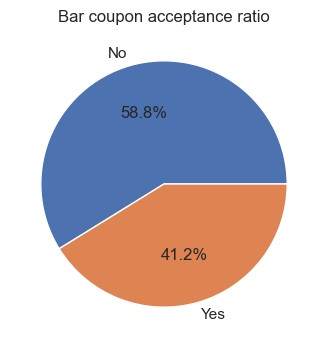

In [110]:
# Bar coupon acceptance ratio

(dfCoupons.groupby("Y").size()/dfCoupons["Y"].count()).\
    plot.pie(
        autopct="%1.1f%%", 
        labels=["No","Yes"], 
        title="Bar coupon acceptance ratio"
    )

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

> Answers:
>
>   - Let's consider '3 or fewer time' is presented as `1~3` in the Bar column 
> 


The drivers who go to a bar more than 3 times a month of accpetance ratio is hihger than the average of the overall Bar coupon acceptance.


<AxesSubplot: title={'center': 'Bar coupon acceptance ratio of drivers who to to bar 1~3 times a month'}, ylabel='0'>

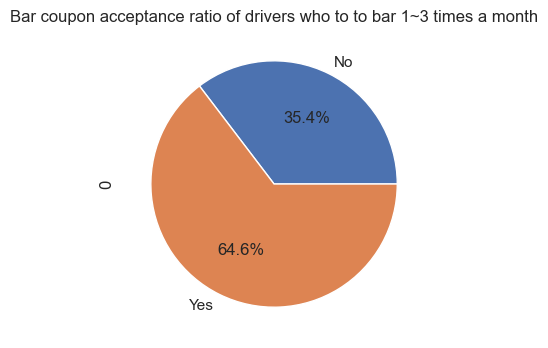

In [111]:
# 
# (dfCoupons.groupby(["Bar", "Y"]).size()/dfCoupons.groupby("Bar").size()).reset_index().query("Bar == '1~3'")
(dfCoupons.groupby(["Bar", "Y"]).size()/dfCoupons.groupby("Bar").size()).reset_index().query("Bar == '1~3'")[0].plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio of drivers who to to bar 1~3 times a month")


Drivers who go to a bar more than 4 times a month accetped the Bar coupon more than the drivers who go to a bar 1~3 times a month

/var/folders/5g/r1ps4fws7z9f7t_hvb49zfdm0000gp/T/ipykernel_68677/3866190264.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Visit bar less than 3 times a month or more than 4+ month')

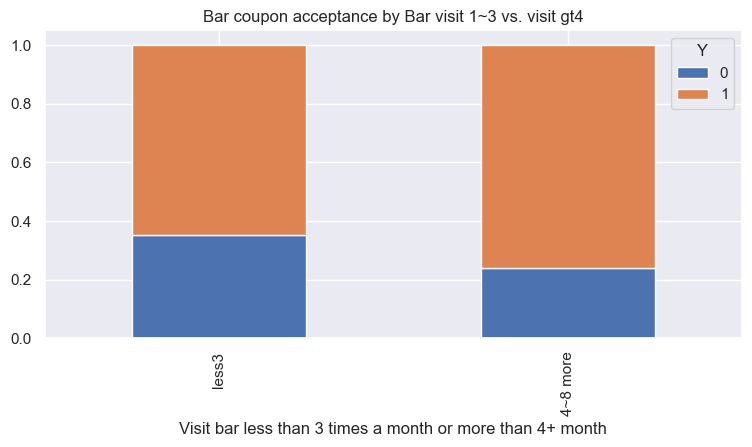

In [112]:
# ["never", "less1", "1~3", "4~8", "gt8"]

# add a column that represents a driver who go to a bar more than 4 time a month    
dfCoupons["BarVisitGT4"] = dfCoupons["Bar"]\
    .apply(lambda x: "4~8 more" if ((x == "4~8") or (x == "gt8")) else "less3")

# Use the "BarVisitGG4" to compare two groups, the group where Bar is 1~3 and another group where Bar is 4~8 or gt8 
(dfCoupons.query("Bar not in ['never', 'less1',]").groupby(["BarVisitGT4", "Y"]).size()/dfCoupons.query("Bar not in ['never', 'less1',]").groupby(["BarVisitGT4"]).size()).unstack().loc[["less3", "4~8 more"]]\
    .plot.bar(stacked=True, title="Bar coupon acceptance by Bar visit 1~3 vs. visit gt4", legend=True).set_xlabel("Visit bar less than 3 times a month or more than 4+ month")

In genernal, there is higher chance that the 'Bar' coupon would be accepted by the drivers who go to a bar 1~3 or more times a month than the drivers who doesn't go or go less than 1 time a month.

Most likely the drivers who don't go to a bar or less than once a month doesn't prefers to take the Bar coupon

Here is chart that shows it.

array([<AxesSubplot: ylabel='0'>], dtype=object)

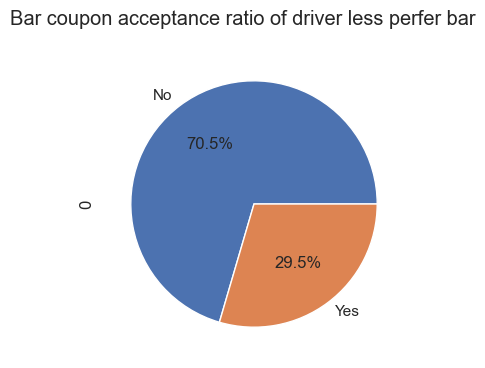

In [113]:
LessOrNever = ["less1","never"]
df_ = (dfCoupons.query("Bar in @LessOrNever").groupby("Y").size().reset_index()[0]/dfCoupons["Y"].count())
df_.plot.pie(autopct="%1.1f%%", labels=["No","Yes"], subplots=True, title="Bar coupon acceptance ratio of driver less perfer bar")


In [114]:
# dfCoupons.query("Bar in @LessOrNever").groupby("Y").size().reset_index()[0]/dfCoupons["Y"].count()

> Finding #1
>
> Let's see the 'Bar' Coupon acceptance ratio of the drivers who goes to a bar more than once. 
>
> 'Bar' coupon could be accepted with a higher chance by the drivers who go to a bar more than once a month accept the coupon. 
>

Conculsion is that drivers who go to the bar more than once a month may see a higher chance of accepting the coupon than the other drivers who doesn't.

<AxesSubplot: title={'center': 'Coupon acceptance ratio by number of bar visits'}, xlabel='Bar'>

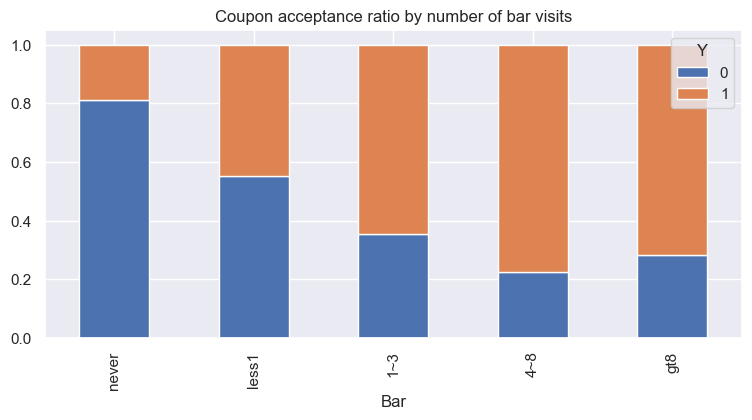

In [115]:
BarVisitCouponAccepts = ((dfCoupons.groupby(["Bar", "Y"]).size()/dfCoupons.groupby("Bar").size()).unstack().loc[["never", "less1", "1~3", "4~8", "gt8"]]).\
    plot.bar(
        stacked=True, 
        title="Coupon acceptance ratio by number of bar visits"
    )
BarVisitCouponAccepts

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

> Answer:

69% of the group - go to a bar 1~3 and age is around 25 - accepted the coupon but the rest, 31% said no to the offer


<AxesSubplot: title={'center': 'Bar coupon accecptance ratio of driver who is older than 25 and goes a bar more than once a month, '}>

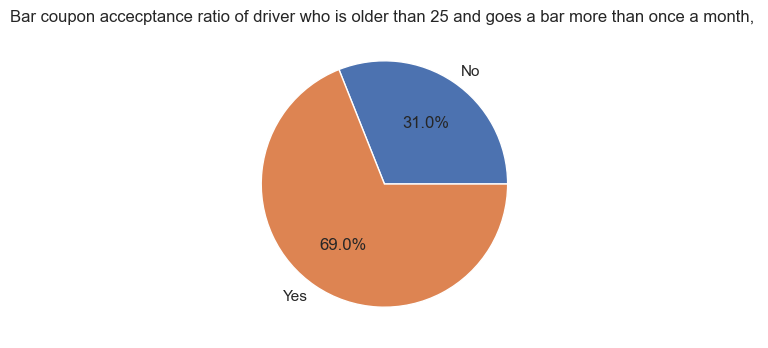

In [116]:
BarVisitTimes = ["1~3", "4~8","gt8"]
OlderThan25 = ["26", "31", "36", "41", "46", "50plus"]

# print("Older than 25 and likes bar")
# print(dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25").groupby("Y").size()/dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25")["Y"].count())
(dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25").groupby("Y").size()/dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25")["Y"].count()).\
    plot.pie(
        autopct="%1.1f%%",
        title="Bar coupon accecptance ratio of driver who is older than 25 and goes a bar more than once a month, ", 
        labels=["No", "Yes"]
    )

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

> Answer:

48.7% of the group -drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry- accepted the coupon, 51.3% said no.


<AxesSubplot: title={'center': 'bar coupon accecptance ratio'}>

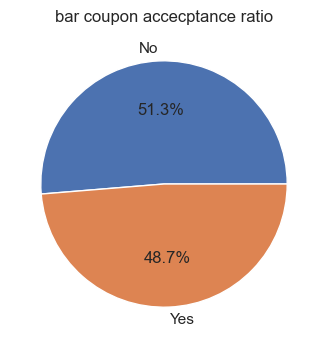

In [117]:
NoKidPassangers = ["Friend(s)","Partner"]
OccupationFilter = ["Farming Fishing & Forestry"]

# print(dfCoupons.query("passanger in @NoKidPassangers & occupation not in @OccupationFilter").groupby("Y").size()/dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25")["Y"].count())
(dfCoupons.query("passanger in @NoKidPassangers & occupation not in @OccupationFilter").groupby("Y").size()/dfCoupons.query("Bar in @BarVisitTimes & age in @OlderThan25")["Y"].count()).\
    plot.pie(
        autopct="%1.1f%%", 
        title="bar coupon accecptance ratio", 
        labels=["No", "Yes"]
    )


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<AxesSubplot: title={'center': 'bar coupon accecptance ratio of a driver who is not Widowed had ault passanger(s)'}>

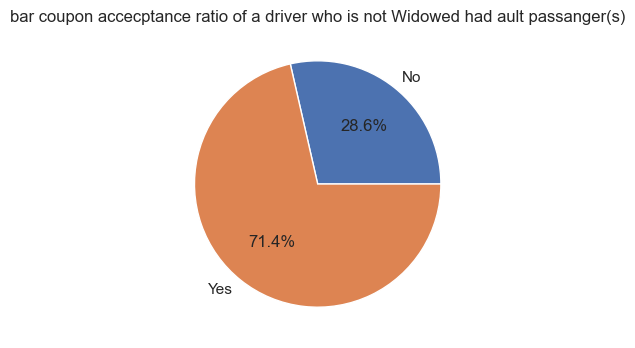

In [118]:
# 6.1. 
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

NoKidPassangers = ["Friend(s)","Partner"]
OccupationFilter = ["Farming Fishing & Forestry"]
BarVisitTimes = ["1~3", "4~8","gt8"]
OlderThan25 = ["26", "31","36","41", "46", "50plus"]

# print("Go to bars more than once a month, had passengers that were not a kid, and were not widowed ")
# print(dfCoupons.query("passanger in @NoKidPassangers & maritalStatus != 'Widowed'").groupby("Y").size()/dfCoupons.query("passanger in @NoKidPassangers & maritalStatus != 'Widowed'")["Y"].count())
(dfCoupons.query("Bar in @BarVisitTimes & passanger in @NoKidPassangers & maritalStatus != 'Widowed'").groupby("Y").size()/dfCoupons.query("Bar in @BarVisitTimes & passanger in @NoKidPassangers & maritalStatus != 'Widowed'")["Y"].count()).\
    plot.pie(
        autopct="%1.1f%%", 
        labels=["No", "Yes"],
        title="bar coupon accecptance ratio of a driver who is not Widowed had ault passanger(s)"
    )

<AxesSubplot: title={'center': 'bar coupon accecptance ratio of a driver who go to bars more than once a month and are under the age of 30'}>

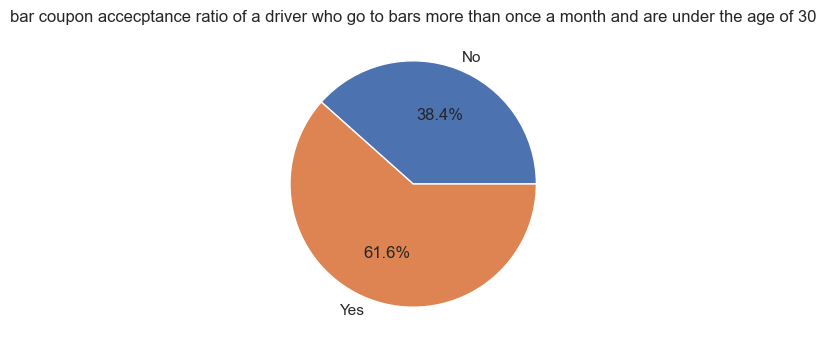

In [119]:
# go to bars more than once a month and are under the age of 30
BarVisitTimes = ["1~3", "4~8","gt8"]
YoungAges = ["below21", "21", "26"]
(df.query("Bar in @BarVisitTimes & age not in @YoungAges").groupby("Y").size()/df.query("Bar in @BarVisitTimes & age not in @YoungAges")["Y"].count()).\
        plot.pie(
                autopct="%1.1f%%", 
                labels=["No", "Yes"],
                title="bar coupon accecptance ratio of a driver who go to bars more than once a month and are under the age of 30")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

> Answer:
>

### Conculsion 

`Regardless of age, maritalStatus or passanger, the drivers who go to a bar more than once a month, will accept the 'Bar' coupon with more than 50% of chance`

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Is there a difference accecptance ratio per age?

> Answer:

The coupon acceptance ratio is simailar acorss ages.

Text(0.5, 1.0, 'Coupon acceptance by age')

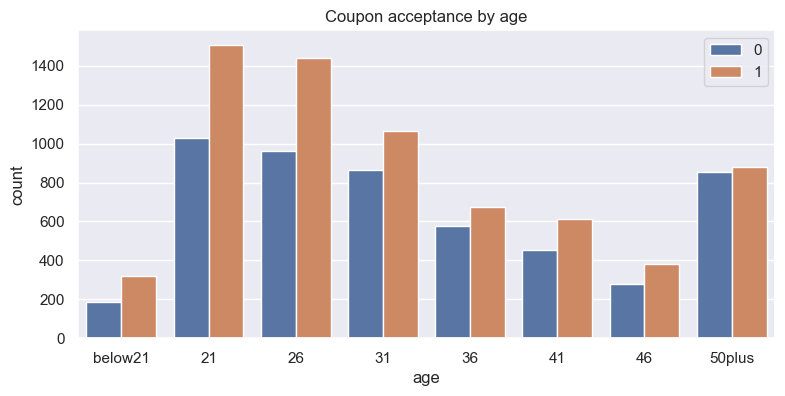

In [120]:
# print(df.groupby(["Y","age"]).size().reset_index().rename(columns={0:"counts"}))
# Coupon acceptance by age
# axCouponAcceptanceByage =  sns.barplot(data=df.groupby(["Y","age"]).size().reset_index().rename(columns={0:"counts"}), x="age", y="counts", hue="Y", order=["below21", "21", "26", "31", "36", "41", "46", "50plus"])

axCouponAcceptanceByage = sns.countplot(data=df, x="age", hue="Y", order=["below21", "21", "26", "31", "36", "41", "46", "50plus"])
axCouponAcceptanceByage.legend()
axCouponAcceptanceByage.set_title("Coupon acceptance by age")

In [121]:
# df_ = df[["direction_same","direction_opp", "Y"]]
# axDirectionSame = sns.countplot(data=df_, x="direction_same", hue="Y", palette="Set1")
# axDirectionOpp = sns.countplot(data=df_, x="direction_opp", hue="Y", ax=axDirectionSame, palette="Set2")

# sns.heatmap(data=df_, )

In [122]:
# incomeOrder = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999","$50000 - $62499","$62500 - $74999","$75000 - $87499","$87500 - $99999"]
# # df_ = df["income"].value_counts().loc[incomeOrder]
# # sns.barplot(data=df, x="income", hue="Y")
# px.violin(data_frame=df, x="Y", y="Y")

In [123]:
px.density_heatmap(data_frame=df, x="destination", y="coupon", facet_row="Y",
    width=1024, height=768) #marginal_x="box", marginal_y="box", labels={}

<AxesSubplot: xlabel='destination'>

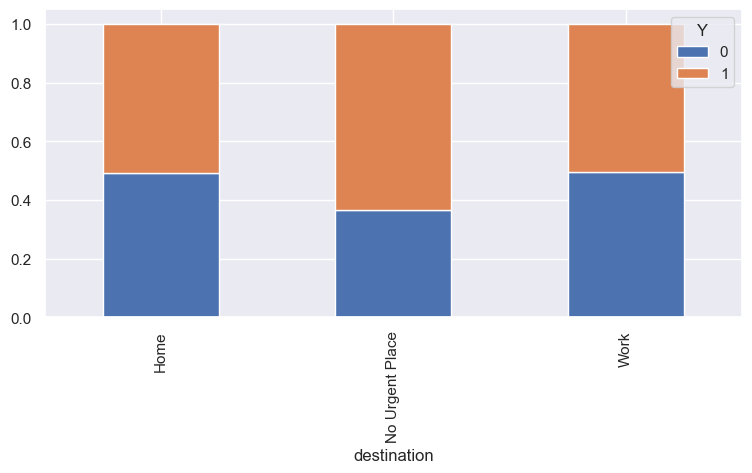

In [124]:
(df.groupby(["destination", "Y"]).size()/df.groupby(["destination"]).size()).unstack().\
    plot.bar(stacked=True,)

In [125]:

(df.groupby(["destination", "Y"]).size()/df.groupby(["destination"]).size()).unstack()

Y,0,1
destination,,
Home,0.491734,0.508266
No Urgent Place,0.365997,0.634003
Work,0.496032,0.503968


_Q.What is the probability of accepting a coupon for a driver who has no particular destination?_

> Answer:

The chance of the coupons acceptance can be increased two times more than rejection of the coupons when the driver's destinatino is not claer, for exmaple, 'No Urgent Place'

![denHeatmap1](./images/denHeatmap1.png)
<!-- <img src="./images/denHeatmap1.png" width="800" height="200" /> -->

In [126]:
# px.violin(data_frame=df, x="destination", y="Y")

denHeatmap1 = px.density_heatmap(data_frame=df, x="destination", y="Y", marginal_x="histogram", marginal_y="histogram", text_auto=True, title="Coupon Acceptance ratio by destination",
    width=1024, height=768)
denHeatmap1.write_image("./images/denHeatmap1.png",
    width=1600, height=900, scale=1)
denHeatmap1.show()


_Q. Does temperature effect coupon acceptance?_

> Answers:

Depends on the temperature and type of the coupon, the coupon acceptance ratio can be changed. 

For example, when the temperature is around 80, there is 8% more chances that the 'Coffee House' coupon could be accepted.

![denHeatmap2](./images/denHeatmap2.png)


In [127]:
# (df.query("coupon=='Coffee House'").groupby(["coupon", "temperature", "Y"]).apply(lambda x: "hot" if (x.temperature == 80) else "cool"))

def isHot(temp):
    if temp == 80:
        return "Hot"
    else:
        return "cool"

df["isHot"] = df["temperature"].apply(isHot)
(df.query("coupon=='Coffee House'").groupby(["coupon", "isHot", "Y"]).size()/df.query("coupon=='Coffee House'").groupby(["coupon", "isHot"])["Y"].size())


coupon        isHot  Y
Coffee House  Hot    0    0.473020
                     1    0.526980
              cool   0    0.550066
                     1    0.449934
dtype: float64

In [128]:
denHeatmap2 = px.density_heatmap(data_frame=df, x="temperature", y="Y", facet_col="coupon", marginal_x="histogram", marginal_y="histogram", text_auto=True, title="Coupon Acceptance ratio by destination",)
denHeatmap2.write_image("./images/denHeatmap2.png",
    width=1600, height=900, scale=1)
denHeatmap2.show()